![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

   listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24 2019
4        5238          Ben  June 09 2019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   listing_id   25209 non-null  int64         
 1   host_name    25201 non-null  object        
 2   last_review  25209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int6

<Figure size 2000x800 with 0 Axes>

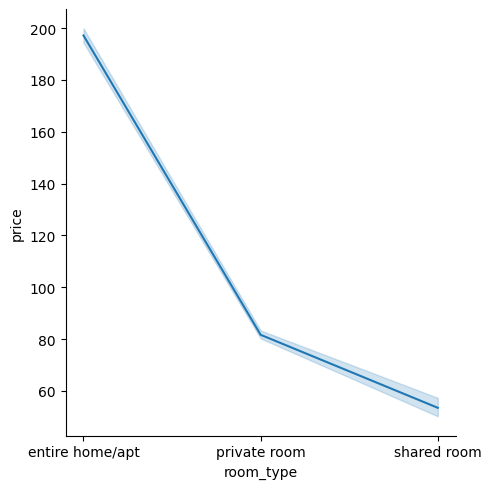

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load tsv file
airbnb_last_review = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')
print(airbnb_last_review.head())
print(airbnb_last_review.info())

# Convert the last review column to datetime
airbnb_last_review['last_review'] = pd.to_datetime(airbnb_last_review['last_review'])
print(airbnb_last_review.info())

# The earliest review date
earliest_date_sort = airbnb_last_review['last_review'].sort_values(ascending=True)
print(earliest_date_sort)

earliest_date = earliest_date_sort.iloc[0]
print('The earliest review was written in', earliest_date)

# The latest review date
latest_date_sort = airbnb_last_review['last_review'].sort_values(ascending=False)
print(latest_date_sort)

latest_date = latest_date_sort.iloc[0]
print('The most recent review was written in', latest_date)

# How many listings are private rooms?
# Load excel file
airbnb_room_type = pd.read_excel('data/airbnb_room_type.xlsx')
print(airbnb_room_type.head())

# Check the value count of each room type
print(airbnb_room_type['room_type'].value_counts())

# Cause the private room has variation in capitalization, convert to small letter
airbnb_room_type['room_type'] = airbnb_room_type['room_type'].str.lower()
print(airbnb_room_type['room_type'].value_counts())

# To get the total of Private room listings
private_room_listing = (airbnb_room_type['room_type'] == 'private room').sum()
print(private_room_listing, 'listings are Private rooms')

# What is the average listing price?
# Load csv airbnb price file
airbnb_price = pd.read_csv('data/airbnb_price.csv')
print(airbnb_price.head())
print(airbnb_price.info())

# Remove the dollars
airbnb_price['price'] = airbnb_price['price'].str.replace('dollars', '')

# Convert to int
airbnb_price['price'] = airbnb_price['price'].astype('float')

average_listing_prop = airbnb_price['price'].mean()
print('The average listing price is', average_listing_prop)

# Round to the nearest penny
average_listing = np.round(average_listing_prop, 2)
print('The average listing price is', average_listing)

# Review dates dataframe
review_dates = pd.DataFrame({'first_reviewed': [earliest_date],
                             'last_reviewed': [latest_date],
                             'nb_private_rooms': [private_room_listing],
                             'avg_price': [average_listing]})

print(review_dates.head())

# Further analysis

# merge the three datasets
airbnb = airbnb_last_review.merge(airbnb_price, on='listing_id').merge(airbnb_room_type, on='listing_id')
print(airbnb.head())
print(airbnb.info())

# Visualization
# Relationship between the room type and prices
plt.figure(figsize=(20,8))
sns.relplot(y='price', x='room_type', data=airbnb, kind='line')
plt.show()
